# 사이킷런을 타고 떠나는 머신러닝 분류 모델 여행

* 3.1 분류 알고리즘 선택
* 3.2 사이킷런 첫걸음: 퍼셉트론 훈련
* 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링
* 3.4 서포트 벡터 머신을 사용한 최대 마진 분류
* 3.5 커널 SVM을 사용하여 비선형 문제 풀기
* 3.6 결정 트리 학습
* 3.7 k-접근점 이웃: 게으른 학습 알고리즘


## 3.1 분류 알고리즘 선택

분류 모델의 예측 성능과 계산 능력은 학습하려는 데이터에 크게 의존한다.

>데이터의 크기, 차원, 특성, 클래스의 수, 클래스의 분포, 클래스의 불균형 여부, 데이터의 선형적 분리 가능 여부 등을 고려해야 한다.

머신 러닝 알고리즘을 훈련하기 위한 주요 단계

1. 특성을 선택하고 훈련 데이터를 수집한다.
2. 성능 지표를 선택한다.
3. 학습 알고리즘을 선택하고 모델을 훈련한다.
4. 모델의 성능을 평가한다.
5. 알고리즘 설정을 바꾸고 모델을 튜닝한다.

## 3.2 사이킷런 첫걸음: 퍼셉트론 훈련

붓꽃 데이터셋을 사용하여 퍼셉트론 모델을 훈련한다.

150개의 붓꽃 샘플에서 2개의 클래스를 분류하는 이진 분류 문제로 변환한다.(setosa와 versicolor)

꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 저장하고, 클래스 레이블은 특성 벡터 y에 저장한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


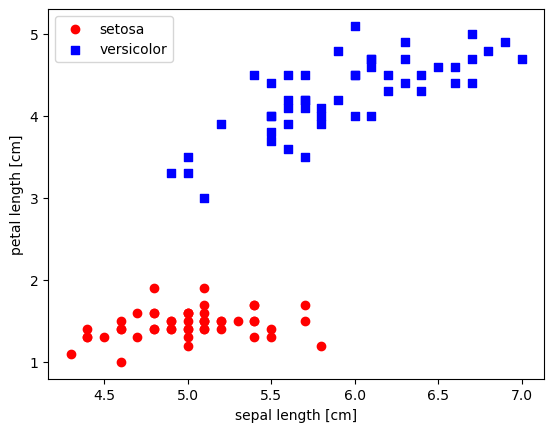

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다.
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = iris_df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다.
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


`np.unique(y)`를 사용하여 클래스 레이블을 확인한다.

In [8]:
# check class labels
print(iris_df['species'].unique())

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


**데이터셋 분할**

훈련 데이터셋과 테스트 데이터셋을 분할한다.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratify=y를 사용하여 계층화 샘플링을 수행합니다.
print("y의 레이블 카운트:", np.bincount(y))
print("y_train의 레이블 카운트:", np.bincount(y_train))
print("y_test의 레이블 카운트:", np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [25]:
# 특성을 표준화합니다. sklearn의 StandardScaler를 사용하여 특성을 표준화합니다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**퍼셉트론 모델 훈련**

* 사이킷런의 Perceptron 클래스를 사용하여 퍼셉트론 모델을 훈련한다.
* 사이킷런 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중 분류(mutliclass classification)를 지원한다.

In [33]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [34]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [35]:
from sklearn.metrics import accuracy_score
print("정확도: %.2f" % accuracy_score(y_test, y_pred))

정확도: 0.98


In [36]:
print("정확도: %.2f" % ppn.score(X_test_std, y_test))

정확도: 0.98


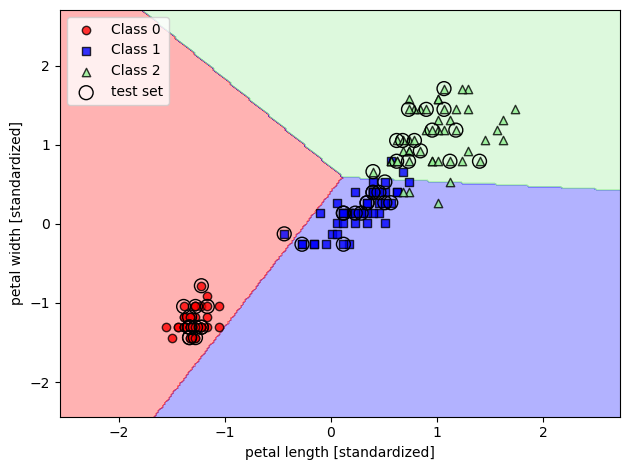

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



def plot_dicision_regions(X, y, classifier: Perceptron, test_idx=None, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # 결정 경계를 그립니다.
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f"Class {cl}", edgecolor='black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_dicision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

* 퍼셉트론은 선형 분류 모델이다.
* 클래스가 선형적으로 구분되지 않을 때 퍼셉트론은 수렴하지 않는다.
* 로지스틱 회귀는 회기가 아니라 분류 모델이다.
